## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis

## Read and Display the dataset

In [2]:
batting_men_df = pd.read_csv("batting_stats.csv")
batting_men_df.head()

,Position,Batsman,Matches,Innings,Runs,Average,Strike_rate,Fours,Sixes
0,1,Rahmanullah Gurbaz,8,8,281,35.12,124.34,18,16
1,2,Rohit Sharma,8,8,257,36.71,156.71,24,15
2,3,Travis Head,7,7,255,42.50,158.39,26,15
3,4,Quinton de Kock,9,9,243,27.00,140.46,21,13
4,5,Ibrahim Zadran,8,8,231,28.88,107.44,25,4


In [3]:
bowling_men_df = pd.read_csv("bowling_stats.csv")
bowling_men_df.head()

,Position,Bowler,Matches,Overs,Balls,Wickets,Economy,Runs
0,1,Fazalhaq Farooqi,8,25.2,152,17,9.41,160
1,2,Arshdeep Singh,8,30.0,180,17,12.65,215
2,3,Jasprit Bumrah,8,29.4,178,15,8.27,124
3,4,Anrich Nortje,9,35.0,210,15,13.40,201
4,5,Rashid Khan,8,29.0,174,14,12.79,179


## Graph per function

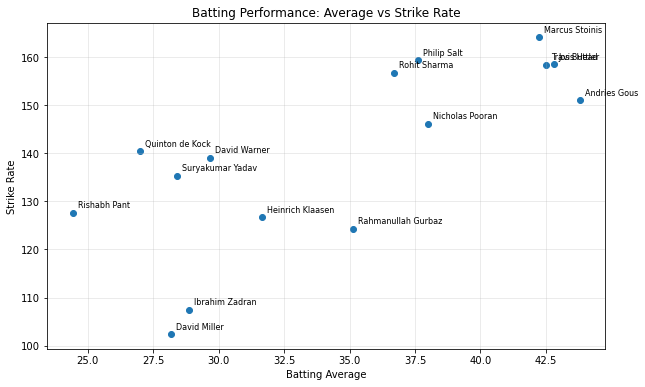

Mean Batting Average: 34.47
Mean Strike Rate: 139.84
Correlation between Average and Strike Rate: 0.74


In [4]:
def create_scatterplot():
    """
    Generates a scatter plot for batting performance, showing the relationship 
    between batting average and strike rate for each batsman. Each player's name 
    is annotated near their respective data point.

    Returns:
        matplotlib.figure.Figure: The figure object containing the scatter plot.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(batting_men_df['Average'], batting_men_df['Strike_rate'], alpha=1.0)

    # Annotate each point with the batsman's name
    for i, txt in enumerate(batting_men_df['Batsman']):
        plt.annotate(
            txt,
            (batting_men_df['Average'].iloc[i], batting_men_df['Strike_rate'].iloc[i]),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=8
        )

    plt.title('Batting Performance: Average vs Strike Rate')
    plt.xlabel('Batting Average')
    plt.ylabel('Strike Rate')
    plt.grid(True, alpha=0.3)
    
    return plt.gcf()

# Generate and display the scatter plot
scatter_plot = create_scatterplot()
plt.show()

# Calculate relevant statistics
average_mean = batting_men_df['Average'].mean()
strike_rate_mean = batting_men_df['Strike_rate'].mean()
correlation_avg_strike = batting_men_df['Average'].corr(batting_men_df['Strike_rate'])

# Print the statistics for reference in the report
print(f"Mean Batting Average: {average_mean:.2f}")
print(f"Mean Strike Rate: {strike_rate_mean:.2f}")
print(f"Correlation between Average and Strike Rate: {correlation_avg_strike:.2f}")

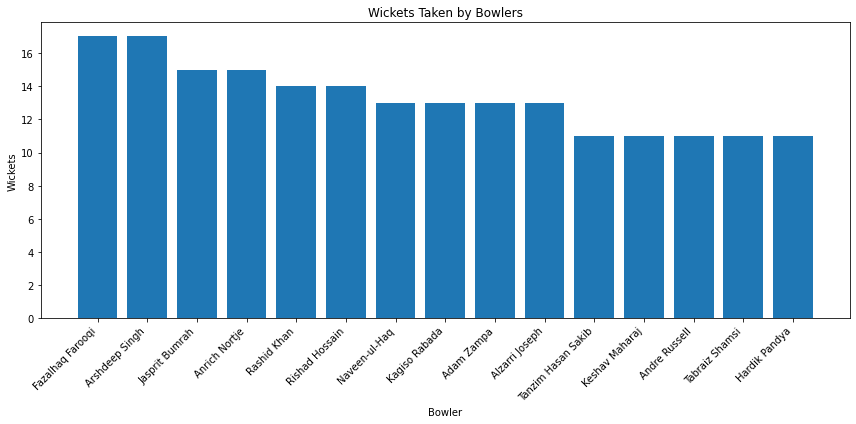

Maximum Wickets Taken: 17
Mean Wickets Taken: 13.27


In [5]:
def create_barchart():
    """
    Generates a bar chart representing the number of wickets taken by each bowler
    in the tournament.

    Returns:
        matplotlib.figure.Figure: The figure object containing the bar chart.
    """

    # Generate the bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(bowling_men_df['Bowler'], bowling_men_df['Wickets'])
    plt.xticks(rotation=45, ha='right')
    plt.title('Wickets Taken by Bowlers')
    plt.xlabel('Bowler')
    plt.ylabel('Wickets')
    plt.tight_layout()
    
    return plt.gcf()

# Generate and display the bar chart
bar_chart = create_barchart()
plt.show()

# Calculate relevant statistics for the report
max_wickets = bowling_men_df['Wickets'].max()
mean_wickets = bowling_men_df['Wickets'].mean()

# Print statistics for reference in the report
print(f"Maximum Wickets Taken: {max_wickets}")
print(f"Mean Wickets Taken: {mean_wickets:.2f}")


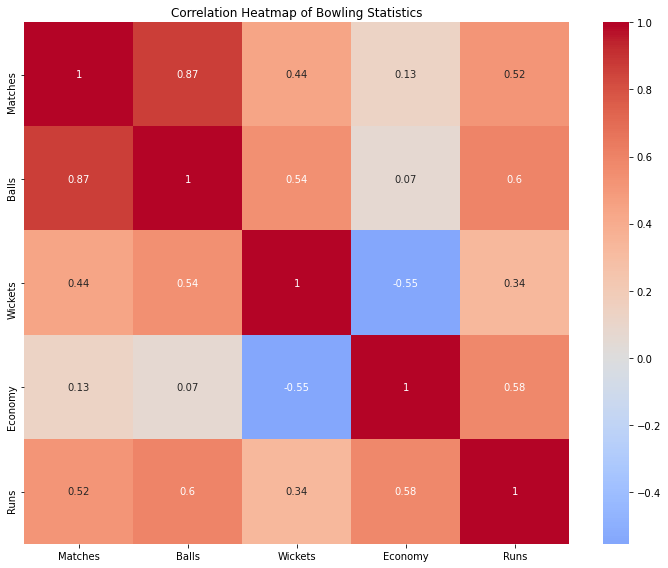

In [6]:
def create_heatmap(bowling_men_df):
    """
    Create a heatmap to visualize the correlation between various bowling statistics.

    This function computes the correlation matrix for the following bowling metrics:
    - Matches: The number of matches played by the bowler.
    - Balls: The total number of balls bowled.
    - Wickets: The total number of wickets taken.
    - Economy: The economy rate, which is the average number of runs conceded per over.
    - Runs: The total number of runs conceded.

    A heatmap is generated to represent the correlations, with the color intensity indicating 
    the strength of the correlation between different statistics. The heatmap is annotated with 
    the correlation coefficients.
    
    Returns:
    -------
    matplotlib.figure.Figure
        The figure object containing the heatmap.
    """
    plt.figure(figsize=(10, 8))
    numeric_cols = ['Matches', 'Balls', 'Wickets', 'Economy', 'Runs']
    correlation_matrix = bowling_men_df[numeric_cols].corr()
    
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Bowling Statistics')
    plt.tight_layout()
    return plt.gcf()

# Generate and display the heatmap
heatmap = create_heatmap(bowling_men_df)
plt.show()

## Statistics

### Mean & Standard Deviation

### describe() & corr() functions

In [8]:
print("Batting Statistics:")
print(batting_men_df.describe())

Batting Statistics:
        Position    Matches    Innings        Runs    Average  Strike_rate  \
count  15.000000  15.000000  15.000000   15.000000  15.000000    15.000000   
mean    8.000000   7.800000   7.400000  212.800000  34.468667   139.838000   
std     4.472136   0.861892   0.985611   35.877171   6.568579    19.168396   
min     1.000000   6.000000   5.000000  169.000000  24.430000   102.420000   
25%     4.500000   7.000000   7.000000  183.000000  28.655000   127.140000   
50%     8.000000   8.000000   8.000000  214.000000  35.120000   140.460000   
75%    11.500000   8.000000   8.000000  237.000000  40.125000   157.550000   
max    15.000000   9.000000   9.000000  281.000000  43.800000   164.080000   

           Fours      Sixes  
count  15.000000  15.000000  
mean   18.066667  11.133333  
std     5.091543   3.700708  
min     9.000000   4.000000  
25%    15.000000   9.500000  
50%    18.000000  10.000000  
75%    21.500000  14.000000  
max    26.000000  17.000000  


In [9]:
print("\nBatting Correlations:")
print(batting_men_df[['Runs', 'Average', 'Strike_rate', 'Fours', 'Sixes']].corr())


Batting Correlations:
                 Runs   Average  Strike_rate     Fours     Sixes
Runs         1.000000  0.263036     0.112445  0.628455  0.622124
Average      0.263036  1.000000     0.743819  0.232010  0.439597
Strike_rate  0.112445  0.743819     1.000000  0.283076  0.423702
Fours        0.628455  0.232010     0.283076  1.000000  0.010867
Sixes        0.622124  0.439597     0.423702  0.010867  1.000000


### Skewness & Kurtosis

In [10]:
def analyze_distribution(data, columns):
    """
    Calculate skewness and kurtosis for specified columns
    """
    results = []
    for col in columns:
        sk = skew(data[col])
        kt = kurtosis(data[col])  # Fisher kurtosis (normal = 0)
        results.append({
            'Column': col,
            'Skewness': round(sk, 3),
            'Kurtosis': round(kt, 3),
            'Distribution_Type': interpret_distribution(sk, kt)
        })
    return pd.DataFrame(results)

def interpret_distribution(sk, kt):
    """
    Interpret the distribution based on skewness and kurtosis values
    """
    interpretation = []
    
    # Skewness interpretation
    if abs(sk) < 0.5:
        interpretation.append("approximately symmetric")
    elif sk > 0:
        interpretation.append("right-skewed")
    else:
        interpretation.append("left-skewed")
    
    # Kurtosis interpretation
    if abs(kt) < 0.5:
        interpretation.append("normal-tailed")
    elif kt > 0:
        interpretation.append("heavy-tailed")
    else:
        interpretation.append("light-tailed")
    
    return ", ".join(interpretation)

print("Batting Statistics Distribution Analysis:")
print(analyze_distribution(batting_men_df, ['Runs', 'Average', 'Strike_rate']))

Batting Statistics Distribution Analysis:
        Column  Skewness  Kurtosis                      Distribution_Type
0         Runs     0.325    -1.051  approximately symmetric, light-tailed
1      Average     0.068    -1.428  approximately symmetric, light-tailed
2  Strike_rate    -0.560    -0.732              left-skewed, light-tailed
